In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
d3=pd.read_csv('covid_19.csv',parse_dates=["Date"])
d3.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0


In [3]:
d3["year"]=d3['Date'].dt.year
d3["month"]=d3['Date'].dt.month
d3["day"]=d3['Date'].dt.day
d3.drop('Date',axis=1,inplace=True)

In [4]:
order=[6,5,4,0,1,2,3]
d3=d3[[d3.columns[i]for i in order]]
d3.head()

,day,month,year,Country,Confirmed,Recovered,Deaths
0,22,1,2020,Afghanistan,0,0,0
1,22,1,2020,Albania,0,0,0
2,22,1,2020,Algeria,0,0,0
3,22,1,2020,Andorra,0,0,0
4,22,1,2020,Angola,0,0,0


In [5]:
print(d3["year"].unique())

[2020]


In [6]:
#the whole data is for the year 2020,so we can drop the column

In [7]:
d3.drop('year',axis=1,inplace=True)

In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
d3['Country']=le.fit_transform(d3['Country'])

In [9]:
d3.isnull().sum()

day          0
month        0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

In [10]:
d3.describe()

,day,month,Country,Confirmed,Recovered,Deaths
count,23688.000000,23688.000000,23688.000000,2.368800e+04,23688.000000,23688.000000
mean,15.968254,3.261905,93.500000,7.969368e+03,2581.801714,526.935030
std,8.730660,1.242007,54.271303,5.842109e+04,15143.101257,3992.815956
min,1.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,8.000000,2.000000,46.750000,0.000000e+00,0.000000,0.000000
50%,16.000000,3.000000,93.500000,1.800000e+01,1.000000,0.000000
75%,24.000000,4.000000,140.250000,7.300000e+02,123.000000,13.000000
max,31.000000,5.000000,187.000000,1.680913e+06,384902.000000,98913.000000


In [11]:
#there are 23688 rows in this dataset.
#there is great difference between  min and max ,his shows the datas are widely spread when we plot them in boxplot
#the large difference between 75% and the max for recovered,country and deaths indicates the presence of outliers

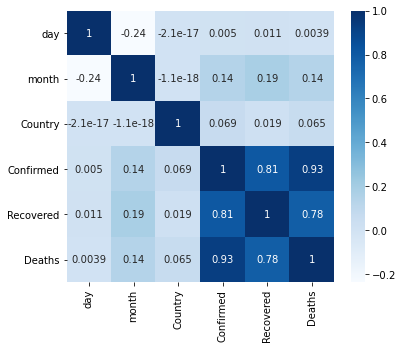

In [12]:
d3cor=d3.corr()
plt.figure(figsize=(6,5))
sns.heatmap(d3cor,cmap='Blues',annot=True)

In [13]:
#death rate is strongly related with the confirmed cases and has very weak relation with the day and country
#this means that this virus is independent of time and country for its spread.
#confirmed cases are more correlated with death than recovered.this means there is more death cases than recovered cases for the confirmed cases.

In [14]:
collist=d3.columns.values
ncol=6
nrows=7

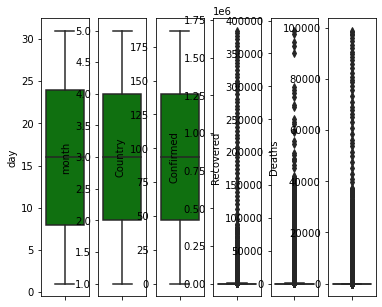

In [15]:
plt.figure(figsize=(ncol,7*ncol))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(d3[collist[i]],color='green',orient='v')

In [16]:
d3.skew()

day          -0.068932
month        -0.107605
Country       0.000000
Confirmed    18.674502
Recovered    10.662286
Deaths       14.218167
dtype: float64

In [17]:
#confirmed,recovered and deaths are very highly skewed datas

In [18]:
for col in d3.columns:
    if d3.skew().loc[col]>0.55:
        d3[col]=np.log1p(d3[col])
d3.skew()

day         -0.068932
month       -0.107605
Country      0.000000
Confirmed    0.538470
Recovered    1.011590
Deaths       1.598833
dtype: float64

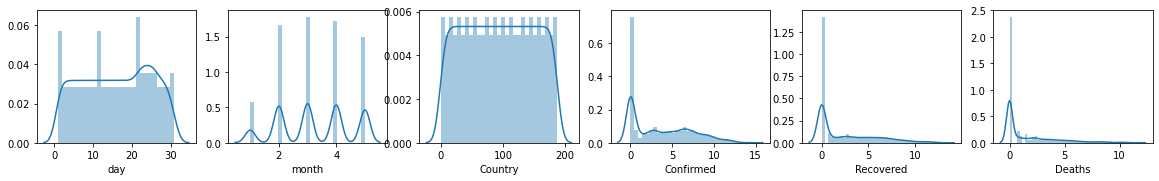

In [19]:
plt.figure(figsize=(20,20))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(d3[collist[i]])

In [20]:
from scipy.stats import zscore
z=np.abs(zscore(d3))
z

array([[0.69088397, 1.8212071 , 1.72286214, 1.02851613, 0.8092577 ,
        0.67086286],
       [0.69088397, 1.8212071 , 1.70443581, 1.02851613, 0.8092577 ,
        0.67086286],
       [0.69088397, 1.8212071 , 1.68600948, 1.02851613, 0.8092577 ,
        0.67086286],
       ...,
       [1.14904913, 1.39945388, 1.68600948, 0.50534411, 0.05256909,
        0.96586491],
       [1.14904913, 1.39945388, 1.70443581, 0.86759469, 1.02734898,
        0.19914217],
       [1.14904913, 1.39945388, 1.72286214, 0.09464234, 0.21887918,
        0.00250018]])

In [21]:
threshold=3
print(np.where(z>3))

(array([11741, 11929, 12117, 12305, 12493, 12681, 12754, 12869, 12942,
       13057, 13130, 13245, 13318, 13334, 13433, 13506, 13522, 13598,
       13621, 13694, 13710, 13786, 13809, 13882, 13898, 13974, 13997,
       14070, 14086, 14162, 14185, 14258, 14274, 14350, 14373, 14446,
       14462, 14466, 14538, 14561, 14634, 14650, 14654, 14726, 14749,
       14822, 14838, 14842, 14914, 14937, 15010, 15026, 15030, 15102,
       15125, 15198, 15214, 15218, 15290, 15313, 15386, 15402, 15406,
       15478, 15501, 15574, 15590, 15594, 15666, 15689, 15762, 15778,
       15782, 15854, 15877, 15950, 15966, 15970, 16042, 16065, 16138,
       16154, 16158, 16230, 16253, 16326, 16342, 16346, 16418, 16441,
       16514, 16530, 16534, 16606, 16629, 16702, 16718, 16722, 16794,
       16817, 16890, 16906, 16910, 16982, 17005, 17078, 17094, 17098,
       17170, 17193, 17266, 17282, 17286, 17312, 17358, 17381, 17454,
       17470, 17474, 17500, 17546, 17569, 17642, 17658, 17662, 17688,
       17734, 17757

In [22]:
d3_new=d3[(z<3).all(axis=1)]
print(d3.shape)
print(d3_new.shape)

(23688, 6)
(23288, 6)


In [23]:
#400 rows are deleted due to outliers

In [24]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split

In [25]:
x=d3_new.iloc[:,:-1]
x

,day,month,Country,Confirmed,Recovered
0,22,1,0,0.000000,0.000000
1,22,1,1,0.000000,0.000000
2,22,1,2,0.000000,0.000000
3,22,1,3,0.000000,0.000000
4,22,1,4,0.000000,0.000000
...,...,...,...,...,...
23683,26,5,183,6.063785,5.902633
23684,26,5,184,2.302585,1.945910
23685,26,5,185,5.521461,2.397895
23686,26,5,186,6.825460,5.820083


In [26]:
y=d3_new.iloc[:,-1]
y

0        0.000000
1        0.000000
2        0.000000
3        0.000000
4        0.000000
           ...   
23683    1.386294
23684    0.693147
23685    3.912023
23686    2.079442
23687    1.609438
Name: Deaths, Length: 23288, dtype: float64

In [48]:
max_r_score=0
for r_state in range(40,150):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
    regr=linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred=regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print("max r2 score corresponding to",final_r_state,"is",max_r_score)

max r2 score corresponding to 66 is 0.8466504837711911


In [28]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.68956377, -1.80807948, -1.72182718, -1.03009278, -0.80622079],
       [ 0.68956377, -1.80807948, -1.70337168, -1.03009278, -0.80622079],
       [ 0.68956377, -1.80807948, -1.68491618, -1.03009278, -0.80622079],
       ...,
       [ 1.14727476,  1.42132229,  1.69244008,  0.56865811, -0.01025392],
       [ 1.14727476,  1.42132229,  1.71089557,  0.94623387,  1.12572063],
       [ 1.14727476,  1.42132229,  1.72935107,  0.14058142,  0.2752847 ]])

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=66)

In [30]:
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [31]:
lm.coef_

array([-0.10925107, -0.43636323, -0.03674966,  1.20272595,  1.1091123 ])

In [32]:
lm.intercept_

1.4578615088710207

In [33]:
lm.score(x_train,y_train)

0.8354754167728974

In [34]:
pred=lm.predict(x_test)
print('predicted o/p:',pred)
print('actual o/p',y_test)

predicted o/p: [ 1.93403289  2.06743487 -0.02632908 ...  4.49061972  1.32633248
  0.17271712]
actual o/p 19983    1.609438
10011    1.098612
867      0.000000
2297     0.000000
19876    6.598509
           ...   
11640    1.386294
20176    0.000000
17486    6.030685
19961    0.000000
1099     0.000000
Name: Deaths, Length: 5124, dtype: float64


In [35]:
print('error:')
print('mean absolute error:',mean_absolute_error(y_test,pred))
print('mean squared error:',mean_squared_error(y_test,pred))
print('root mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))

error:
mean absolute error: 0.6079573374989988
mean squared error: 0.7236650217879924
root mean squared error: 0.8506850308945094


In [36]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.8456557042230459


In [37]:
from sklearn.model_selection import cross_val_score
lmscores=cross_val_score(lm,x,y,cv=5)
print(lmscores)
print(lmscores.mean(),lmscores.std())

[0.52499023 0.26596568 0.66825365 0.76087157 0.74622183]
0.5932605918465736 0.18379191550406154


In [49]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.model_selection import GridSearchCV
from sklearn import datasets

In [38]:
from sklearn .linear_model import Lasso,Ridge, ElasticNet
ls=Lasso(alpha=.001)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.8354727541026802

In [39]:
ls.coef_

array([-0.10705149, -0.43152192, -0.0358555 ,  1.20011932,  1.10707716])

In [40]:
lscores=cross_val_score(ls,x,y,cv=5)
print(lscores)
print(lscores.mean(),lscores.std())

[0.52528483 0.2688502  0.6686834  0.76057301 0.74567145]
0.5938125805675962 0.18263208825253452


In [41]:
rd=Ridge(alpha=.0001)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)

0.8354754167728974

In [42]:
rd.coef_

array([-0.10925107, -0.43636321, -0.03674966,  1.20272593,  1.1091123 ])

In [43]:
rdscores=cross_val_score(rd,x,y,cv=5)
print(rdscores)
print(rdscores.mean(),rdscores.std())

[0.52499024 0.2659657  0.66825366 0.76087157 0.74622182]
0.5932605985968192 0.18379190780995167


In [44]:
enr=ElasticNet(alpha=.001)
enr.fit(x_train,y_train)
enrpred=enr.predict(x_test)
print(enr.score(x_train,y_train))
enr.coef_

0.8354736442863576


array([-0.10769602, -0.43232715, -0.03632381,  1.2002212 ,  1.10749239])

In [45]:
enrscores=cross_val_score(enr,x,y,cv=5)
print(enrscores)
print(enrscores.mean(),enrscores.std())

[0.52566186 0.26913593 0.66913812 0.76068525 0.74577231]
0.5940786942192087 0.1825767100685375


In [54]:
from sklearn.svm import SVR
svr=SVR(kernel='linear')
svr.fit(x_train,y_train)
svr.score(x_train,y_train)
pred_y=svr.predict(x_test)

In [55]:
svr=SVR(kernel='poly')
svr.fit(x_train,y_train)
svr.score(x_train,y_train)
pred_y=svr.predict(x_test)

In [56]:
svr=SVR(kernel='rbf')
svr.fit(x_train,y_train)
svr.score(x_train,y_train)
pred_y=svr.predict(x_test)

In [57]:
kernellist=['linear','poly','rbf']
for i in kernellist:
    sv=SVR(kernel=i)
    sv.fit(x_train,y_train)
    print(sv.score(x_train,y_train))

0.8255315931281499
0.8321071320797295
0.9188156047789512


In [58]:
svrscores=cross_val_score(svr,x,y,cv=5)
print(svrscores)
print(svrscores.mean(),svrscores.std())

[0.45888075 0.89200167 0.83530735 0.84872792 0.72309498]
0.7516025324568678 0.15662086608659884


In [59]:
import joblib
joblib.dump(svr,'svr_covid.pkl')

['svr_covid.pkl']